# Perceiving Objects in Their Surroundings

## Using the Keras RetinaNet code

In [1]:
import os
import zipfile
import urllib.request
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://github.com/fizyr/\
keras-retinanet/archive/0.5.0.zip"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

zip_ref = zipfile.ZipFile('./0.5.0.zip', 'r')
for name in zip_ref.namelist():
  zip_ref.extract(name, './')
zip_ref.close()

In [3]:
os.chdir('./keras-retinanet-0.5.0')
!python setup.py build_ext --inplace
!pip install .

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils\compute_overlap.c
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build\temp.win-amd64-3.6
creating build\temp.win-amd64-3.6\Release
creating build\temp.win-amd64-3.6\Release\keras_retinanet
creating build\temp.win-amd64-3.6\Release\keras_retinanet\utils
C:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Users\John\Anaconda3\envs\DL4Denv\lib\site-packages\numpy\core\include -IC:\Users\John\Anaconda3\envs\DL4Denv\include -IC:\Users\John\Anaconda3\envs\DL4Denv\include "-IC:\Program Files (x86)\Microsoft Visual Studio\2017\BuildTools\VC\Tools\MSVC\14.16.27023\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.17763.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.1

In [4]:
os.chdir('../')
url = "https://github.com/fizyr/\
keras-retinanet/releases/download/0.5.0/\
resnet50_coco_best_v2.1.0.h5"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

('./resnet50_coco_best_v2.1.0.h5', <http.client.HTTPMessage at 0x5121e80>)

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import defaultdict
import keras

from keras_retinanet import models
from keras_retinanet.utils.image import (read_image_bgr, 
                          preprocess_image, resize_image)
from keras_retinanet.utils.visualization import (draw_box, 
                                            draw_caption)
from keras_retinanet.utils.colors import label_color

%matplotlib inline

Using TensorFlow backend.


In [6]:
model_path = os.path.join('.', 'resnet50_coco_best_v2.1.0.h5')

model = models.load_model(model_path, backbone_name='resnet50')

labels_to_names = defaultdict(lambda: 'object', 
                              {0: 'person', 1: 'bicycle', 2: 'car', 
                               3: 'motorcycle', 4: 'airplane', 5: 'bus', 
                               6: 'train', 7: 'truck', 8: 'boat', 
                               9: 'traffic light', 10: 'fire hydrant', 
                               11: 'stop sign', 12: 'parking meter',
                               25: 'umbrella'})

In [7]:
url = "https://upload.wikimedia.org/wikipedia/commons/\
thumb/f/f8/Woman_with_blue_parasol_at_intersection.png/\
640px-Woman_with_blue_parasol_at_intersection.png"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

('./640px-Woman_with_blue_parasol_at_intersection.png',
 <http.client.HTTPMessage at 0xe5e4860>)

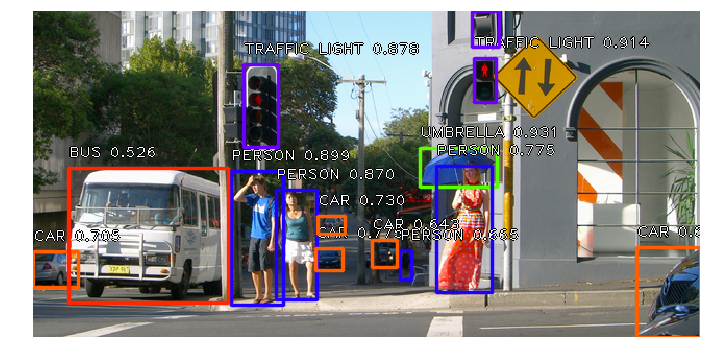

In [8]:
image = read_image_bgr('640px-Woman_with_blue_parasol_at_intersection.png')
draw = image.copy()
draw[:,:,0], draw[:,:,2] = image[:,:,2], image[:,:,0]

image = preprocess_image(image)
image, scale = resize_image(image)

boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes /= scale

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score > 0.5:      
      color = label_color(label)
      b = box.astype(int)
      draw_box(draw, b, color=color)
      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption.upper())
    
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(draw)
plt.show()